In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def create_plot(data_path, target_columns, objective_columns, elite_ratio, save_dir, figsize=(7,5), fontsize=18):
    rename_dict = {"1syh score":"1SYH score (-)", "4lde score":"4LDE score (-)", "6y2f score":"6Y2F score (-)",
                    "singlet-triplet value":"Singlet-triplet gap (eV)", "oscillator strength":"Oscillator strength (-)", 
                    "abs_diff_vee":"Abs. diff.of VEE (eV)",
                    "activation_energy":"Activation energy (kcal/mol)", "reaction_energy":"Reaction energy (kcal/mol)",
                    "1syh_score":"1SYH score (-)", "4lde_score":"4LDE score (-)", "6y2f_score":"6Y2F score (-)",
                    "singlet-triplet_value":"Singlet-triplet gap (eV)", "oscillator_strength":"Oscillator strength (-)", 
                    'similarity_Aripiprazole':'Similarity to Aripiprazole (-)',
                    'similarity_Albuterol': 'Similarity to Albuterol (-)', 'similarity_Mestranol':'Similarity to Mestranol (-)',
                    'similarity_Tadalafil': 'Similarity to Tadalafil (-)', 'similarity_Sildenafil':'Similarity to Sildenafil (-)',
                    'similarity_Camphor': 'Similarity to Camphor (-)', 'similarity_Menthol': 'Similarity to Menthol (-)',
                    'similarity_Fexofenadine': 'Similarity to Fexofenadine (-)', 'similarity_Ranolazine': 'Smilarity to Ranolazine (-)',
                    'logP': 'logP (-)', "tpsa": "TPSA ($\AA^2$)"}
    cutoff_dict = {"1syh score":None, "4lde score":None, "6y2f score":None,
                    "singlet-triplet value":0.571, "oscillator strength":0.171, 
                    "abs_diff_vee":0.1768,
                    "activation_energy":87.0, "reaction_energy":-5.46}
    os.makedirs(save_dir, exist_ok=True)
    data = pd.read_csv(data_path)
    target_scaler_dict = {}
    extreme_value_dict = {}
    for i, (target, objective) in enumerate(zip(target_columns, objective_columns)):
        if objective == "minimize":
            extreme_value = min(data[target])
            cutoff = list(data.sort_values(by = target,ascending=True)[:int(len(data)*elite_ratio)][target])[-1]
        elif objective == "maximize":
            cutoff = list(data.sort_values(by = target,ascending=False)[:int(len(data)*elite_ratio)][target])[-1]
            extreme_value = max(data[target])
        extreme_value_dict.update({target: extreme_value})
        # cutoff = cutoff_dict[target]
        print(objective, "cutoff:", cutoff)
        print("extreme value:", extreme_value)
        mean = np.round(np.mean(data[target]), 3)
        std = np.round(np.std(data[target]), 3)
        target_scaler_dict.update({target:(objective, mean, std)})
        print("mean:", mean)
        print("std:", std)
        plt.figure(figsize=figsize)
        n, _, _ = plt.hist(data[target], bins='auto',density=False)#weights=np.zeros_like(data[target]) + 1. / data[target].size)
        if rename_dict.get(target):
            plt.xlabel(rename_dict.get(target), fontsize=fontsize)
        else:
            plt.xlabel(target, fontsize=fontsize)
        plt.ylabel('Count', fontsize=fontsize)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        # plt.title('Distribution of {}'.format(target), fontsize=fontsize+2)
        plt.text(0.7, 0.8, r'$\mu = {}$'.format(mean)+'\n'+r'$\sigma = {}$'.format(std), 
                 transform=plt.gca().transAxes, fontsize=fontsize+3)
        x_start, y_start = cutoff, 0  # 起点坐标
        x_end, y_end = cutoff, max(n)     # 终点坐标

        # 画直线
        # if "score" not in target:
        #     plt.plot([x_start, x_end], [y_start, y_end], linewidth=1.6, color="red")

        # 添加文字说明
        # text_x = x_start + 1  # 文字 x 坐标位置为起点和终点 x 坐标的中点
        # text_y = y_end   # 文字 y 坐标位置为起点和终点 y 坐标的中点
        # text = "Cutoff = {:.2f}".format(cutoff)                    # 文字说明内容
        # plt.text(text_x, text_y, text, ha='center', va='center')
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, target+".svg"), format="svg")
        plt.show()
    return target_scaler_dict, extreme_value_dict
    
def sort_save_dataset(data_path, target_scaler_dict):
    data = pd.read_csv(data_path)
    normalized_scores = []
    for i, row in data.iterrows():
        score = 0
        for target, (objective, mean, std) in target_scaler_dict.items():
            if objective == "minimize":
                score += (row[target] - mean) / std * (-1)
            elif objective == "maximize":
                score += (row[target] - mean) / std
        normalized_scores.append(score)
    data['normalized_scores'] = normalized_scores
    data.to_csv(data_path.replace(".csv", "_normalized.csv"), index=False)
    return data

overall_data = pd.DataFrame()

# Organic Emitter

minimize cutoff: 0.5706784802271501
extreme value: 0.0024943156329302
mean: 1.003
std: 0.396


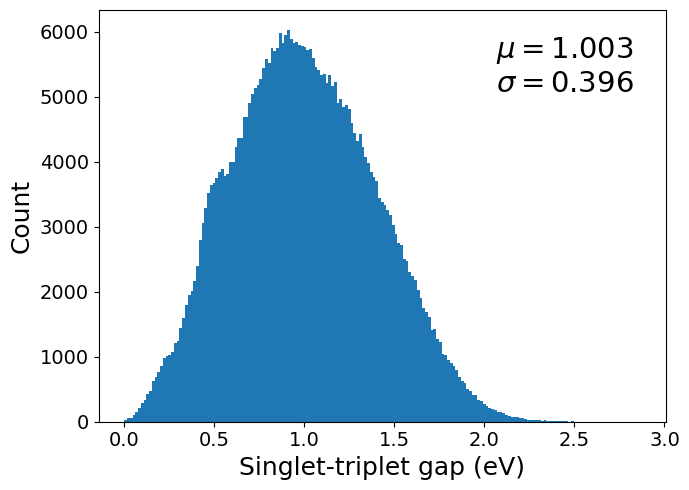

maximize cutoff: 0.1706886245412061
extreme value: 2.973710069218942
mean: 0.086
std: 0.149


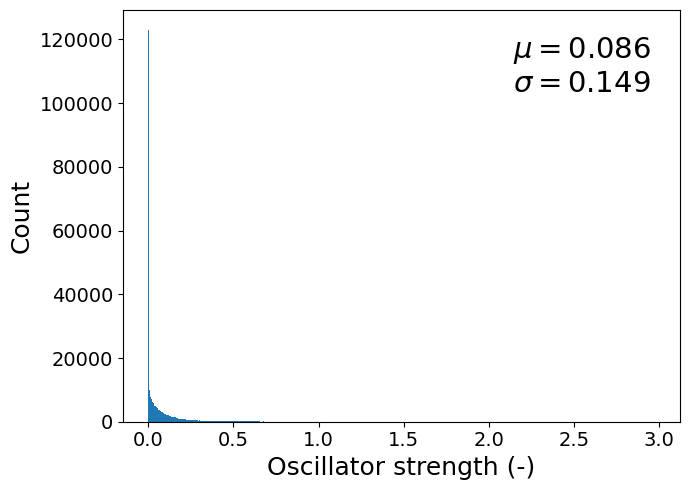

minimize cutoff: 0.1768227406071904
extreme value: 1.9435242512716444e-06
mean: 0.683
std: 0.479


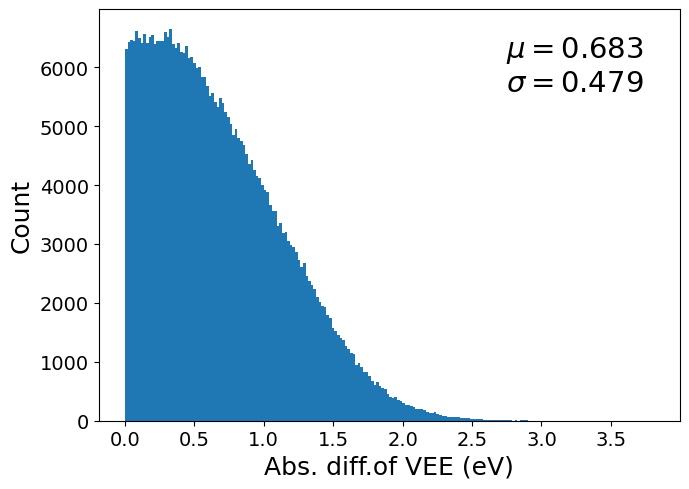

In [6]:
data_path = "./Tartarus/datasets/gdb13.csv"
save_dir = "figures/finals/cutoffs/organic_emitter"
target_columns = ["singlet-triplet value", "oscillator strength", "abs_diff_vee"]
objective_columns = ["minimize", "maximize", "minimize"]
elite_ratio = 0.15

os.makedirs(save_dir, exist_ok=True)
target_scaler_dict, extreme_value_dict = create_plot(data_path, target_columns, objective_columns, elite_ratio, save_dir)
data = sort_save_dataset(data_path, target_scaler_dict)

for target in target_columns:
    overall_data[target] = data[target]

# Protein Ligands (Docking)

minimize cutoff: -7.7
extreme value: -10.0
mean: -2.832
std: 8.928


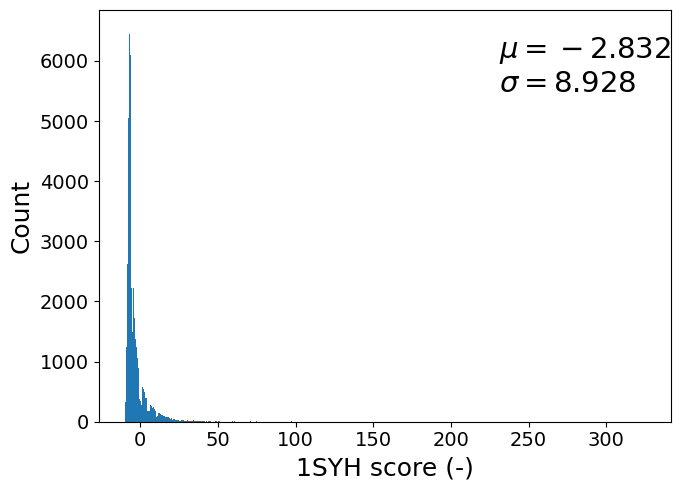

minimize cutoff: -9.3
extreme value: -10.0
mean: -7.547
std: 1.617


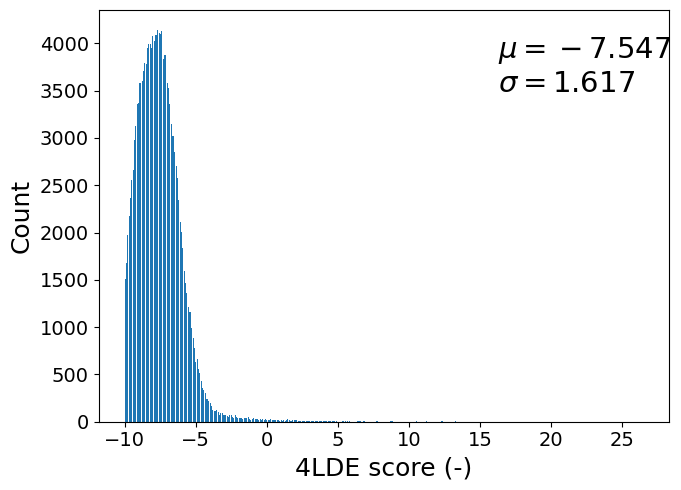

minimize cutoff: -6.8
extreme value: -9.8
mean: -5.528
std: 0.997


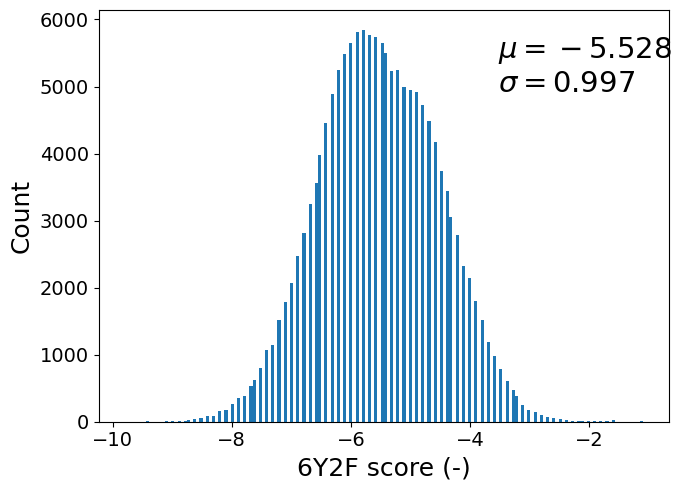

In [7]:
data_path = "./Tartarus/datasets/docking.csv"
save_dir = "figures/finals/cutoffs/docking"
target_columns = ["1syh score", "4lde score", "6y2f score"]
objective_columns = ["minimize", "minimize", "minimize"]
elite_ratio = 0.1

os.makedirs(save_dir, exist_ok=True)
target_scaler_dict, extreme_value_dict = create_plot(data_path, target_columns, objective_columns, elite_ratio, save_dir)
data = sort_save_dataset(data_path, target_scaler_dict)
for target in target_columns:
    overall_data[target] = data[target]

## Reactivity molecule design

maximize cutoff: 86.96834316341382
extreme value: 99.84126949273444
mean: 84.104
std: 3.076


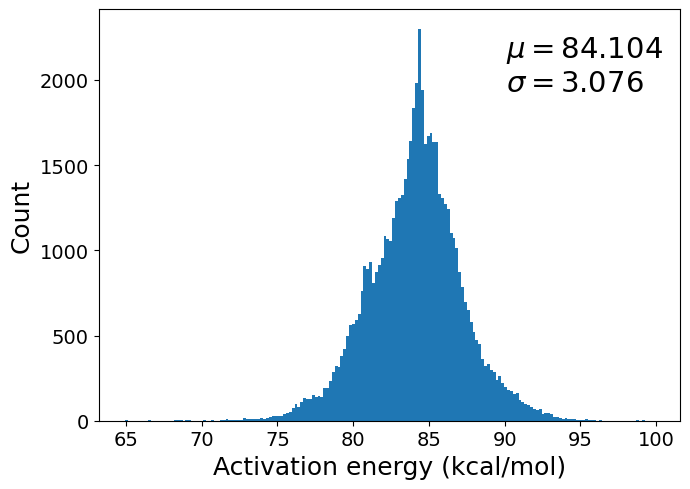

minimize cutoff: -5.462259419097024
extreme value: -34.387432213524335
mean: -0.749
std: 4.507


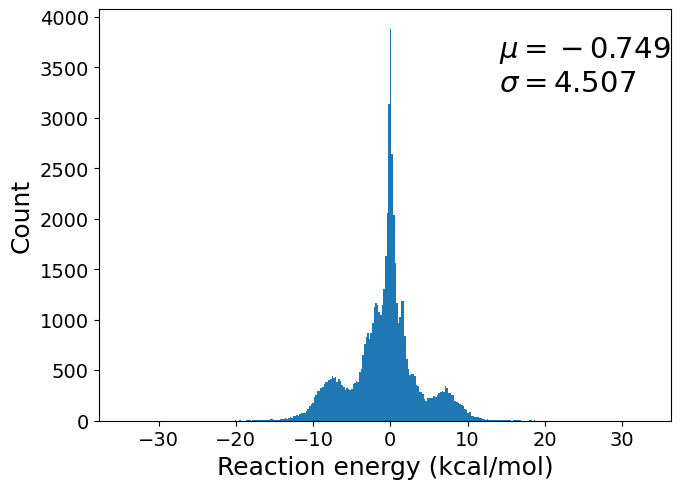

In [8]:
data_path = "./Tartarus/datasets/reactivity.csv"
save_dir = "figures/finals/cutoffs/reactivity"
target_columns = ["activation_energy", "reaction_energy",]
objective_columns = ["maximize", "minimize",]
elite_ratio = 0.15

os.makedirs(save_dir, exist_ok=True)
target_scaler_dict, extreme_value_dict = create_plot(data_path, target_columns, objective_columns, elite_ratio, save_dir)
data = sort_save_dataset(data_path, target_scaler_dict)
for target in target_columns:
    overall_data[target] = data[target]

## Correlation analysis fo multi-objective tasks

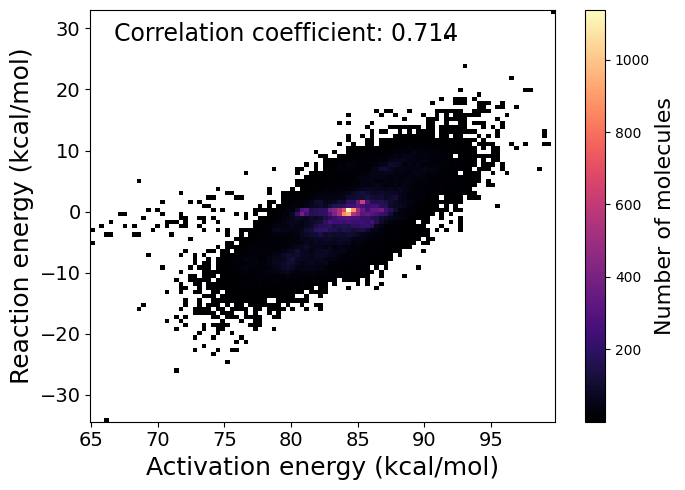

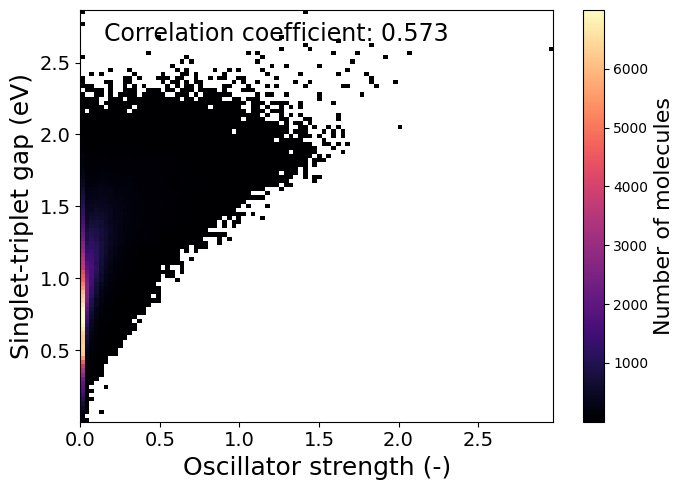

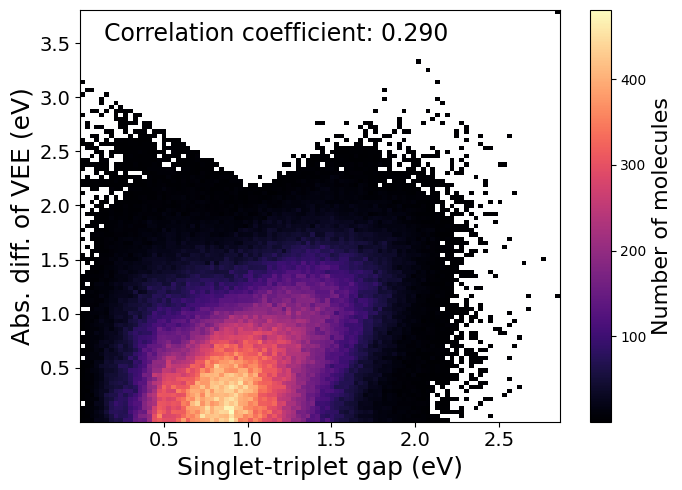

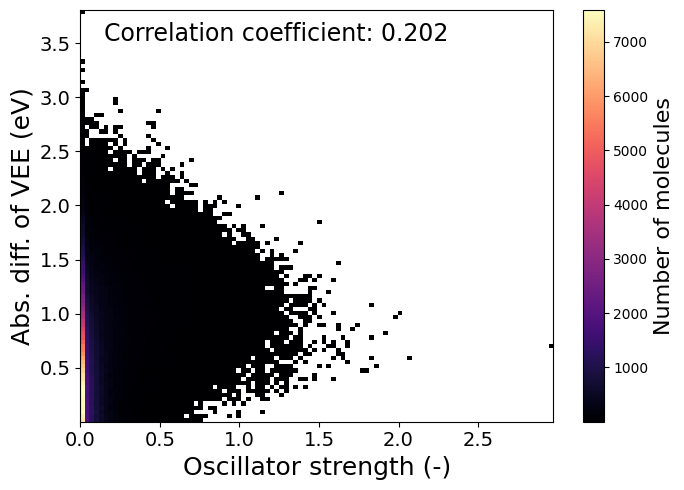

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load your data
data_path = "./Tartarus/datasets/reactivity.csv"
x_col = "Ea"
y_col = "Er"
x_label = "Activation energy"
y_label = "Reaction energy"
save_path = "./figures/correlation/reactivity.svg"

def plot_correlation(data_path, x_col, y_col, x_label, y_label, save_path=None):
    data = pd.read_csv(data_path).dropna()
    # Define the number of bins in each direction
    num_bins = 100
    # Compute the 2D histogram
    counts, xedges, yedges = np.histogram2d(data[x_col], data[y_col], bins=num_bins)
    correlation_coefficient, _ = pearsonr(data[x_col], data[y_col])

    # Create a colormap where 0 counts are mapped to white
    cmap = sns.color_palette("magma", as_cmap=True)
    cmap.set_under(color='white')
    # Plot the 2D histogram
    plt.figure(figsize=(7, 5))
    plt.imshow(counts.T, origin='lower', cmap=cmap, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', vmin=0.1)
    cbar = plt.colorbar(label='Number of molecules')
    cbar.set_label('Number of molecules', fontsize=16)
    plt.xlabel(x_label, fontsize=18)
    plt.ylabel(y_label, fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.text(.05, .97, 'Correlation coefficient: {:.3f}'.format(correlation_coefficient), 
            ha='left', va='top', transform=plt.gca().transAxes, fontsize=17)
    # plt.grid(True)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, format="svg")
    plt.show()

plot_correlation("./Tartarus/datasets/reactivity.csv", "Ea", "Er", 
                 "Activation energy (kcal/mol)", "Reaction energy (kcal/mol)", save_path="./figures/finals/correlation_plots/reactivity.svg")
plot_correlation("./Tartarus/datasets/gdb13.csv", "oscillator strength", "singlet-triplet value", 
                 "Oscillator strength (-)", "Singlet-triplet gap (eV)", save_path="./figures/finals/correlation_plots/os_stv_1.svg")
plot_correlation("./Tartarus/datasets/gdb13.csv", "singlet-triplet value", "abs_diff_vee", 
                 "Singlet-triplet gap (eV)", "Abs. diff. of VEE (eV)", save_path="./figures/finals/correlation_plots/stv_abs_diff_vee_2.svg")
plot_correlation("./Tartarus/datasets/gdb13.csv", "oscillator strength", "abs_diff_vee", 
                 "Oscillator strength (-)", "Abs. diff. of VEE (eV)", save_path="./figures/finals/correlation_plots/os_abs_diff_vee_3.svg")
# plot_correlation("./dockstring/dockstring-dataset.csv", "JAK2", "LCK", 
#                  "JAK2", "LCK", save_path="./figures/correlation/JAK2_LCK.svg")

## Box plots for analyzing the property distribution

,singlet-triplet value,oscillator strength,abs_diff_vee,1syh score,4lde score,6y2f score,activation_energy,reaction_energy
0,0.842677,0.018980,3.025267,-6.5,-5.9,-4.5,78.908246,-10.812913
1,1.036067,0.049251,2.246869,-1.4,-8.9,-5.6,91.260647,7.454271
2,1.122774,0.071230,2.678786,23.6,-6.0,-7.3,84.174659,-0.603910
3,1.379734,0.145970,3.960688,-6.9,-7.3,-5.2,81.977844,-2.153216
4,0.622884,0.005678,1.672950,-5.9,-6.1,-4.6,91.034033,8.809626


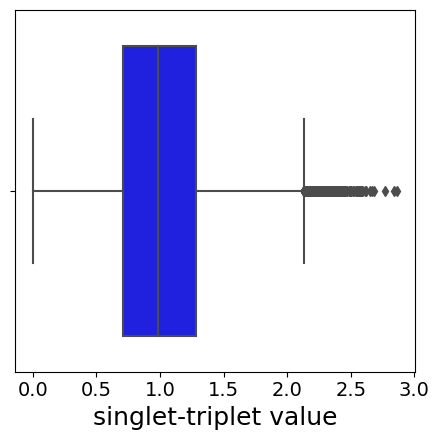

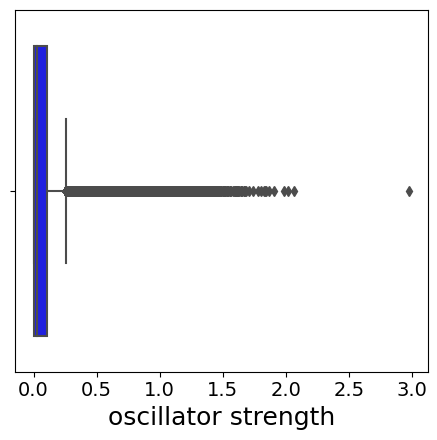

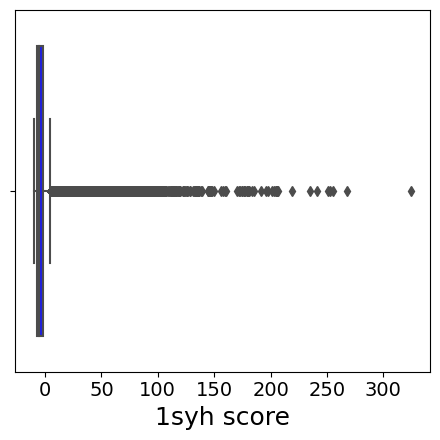

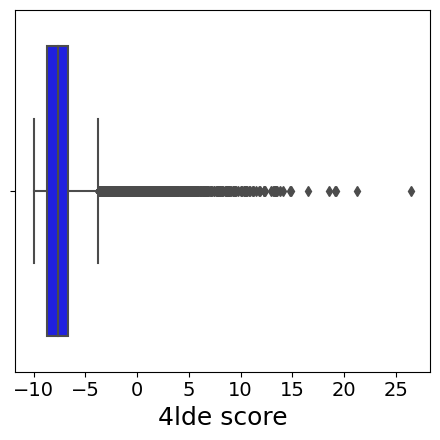

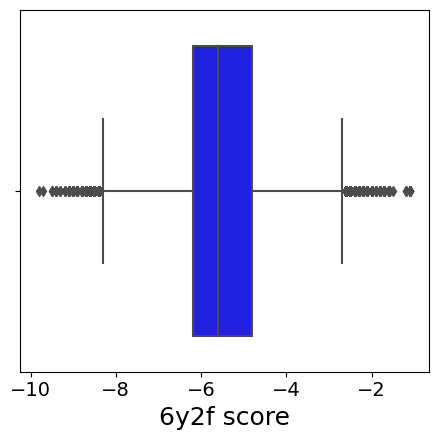

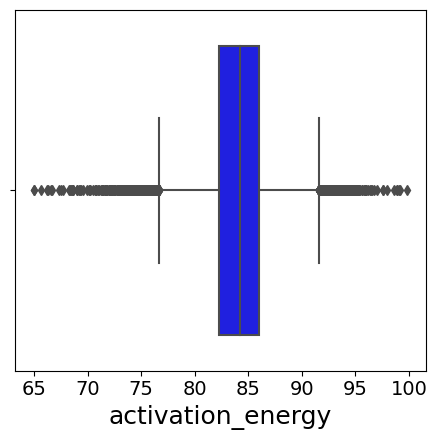

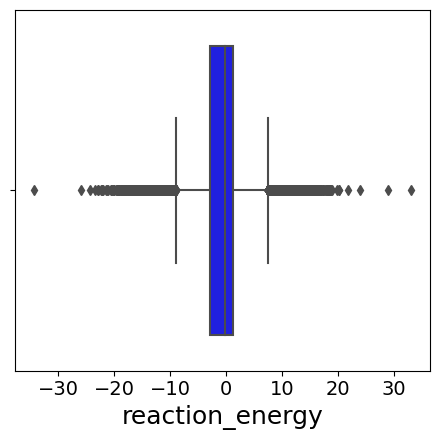

In [17]:
import seaborn as sns
os.makedirs("figures/box_plots", exist_ok=True)

all_targets = ['singlet-triplet value', "oscillator strength", '1syh score', '4lde score', '6y2f score',
              'activation_energy', 'reaction_energy']
for i, target in enumerate(all_targets):
    plt.figure(figsize=(4.5, 4.5))
    sns.boxplot(x=overall_data[target], data=overall_data, palette=["blue"], orient="Vertical",)
    plt.xlabel(target, fontsize=18)
    plt.xticks(fontsize=14)
    plt.tight_layout()
    plt.savefig(f"figures/box_plots/{i+1}_{target}.png")

overall_data.head()


In [9]:
data

,smiles,smiles_stereo,activation_energy,reaction_energy,SAScore,time,n_cpus,outlier,Ea,Er,sum_Ea_Er,diff_Ea_Er,normalized_scores
0,CC=CC(C)=CC=CC=CC1CC2CC1C13CC21C1C=CC3C1,C/C=C/C(C)=C/C=C\C=C\[C@H]1C[C@H]2C[C@@H]1[C@]...,78.908246,-10.812913,6.507356,132.538859,24,False,78.908246,-10.812913,10000.000000,10000.000000,0.543825
1,OC1=CC2C(c3ccccc3)C1C13CC21C1CCC3C1,OC1=C[C@H]2[C@@H](c3ccccc3)[C@@H]1[C@]13C[C@]2...,91.260647,7.454271,5.713203,39.666178,24,False,91.260647,7.454271,98.714918,-83.806376,0.506490
2,SC12C=CC(C1)C13CC21C1CCC3C1C1=CC=CC1,S[C@]12C=C[C@H](C1)[C@]13C[C@]21[C@@H]1CC[C@H]...,84.174659,-0.603910,6.785813,64.665632,24,False,84.174659,-0.603910,10000.000000,10000.000000,-0.009221
3,CC1CC2CC1C13OC21C1C=CC3C1CC=CC=CF,C[C@H]1C[C@H]2C[C@@H]1[C@]13O[C@]21[C@@H]1C=C[...,81.977844,-2.153216,6.689424,390.735470,24,False,81.977844,-2.153216,10000.000000,10000.000000,-0.379645
4,IC=CC1=CC2CC1C13CC21C1CCC3S1,I/C=C/C1=C[C@H]2C[C@@H]1[C@]13C[C@]21[C@@H]1CC...,91.034033,8.809626,7.038059,48.791010,24,False,91.034033,8.809626,10000.000000,10000.000000,0.132097
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60823,C1=CCC(C23CCC(N2)C24SC32C2C=CC4C2)=C1,C1=CCC([C@@]23CC[C@@H](N2)[C@@]24S[C@@]32[C@H]...,87.835270,2.412857,6.833599,60.668708,24,False,87.835270,2.412857,10000.000000,10000.000000,0.511483
60824,C1=CCC(C=CC=CCC2C3CCC2C24OC32C2C=CC4C2)C=C1,C1=CC[C@@H](/C=C/C=C/C[C@H]2[C@@H]3CC[C@H]2[C@...,86.796988,-0.217781,6.560599,77.856402,24,False,86.796988,-0.217781,10000.000000,10000.000000,0.757618
60825,IC=CC=CC=CC1C2C=CC1C13CC21C1CCC3C1,I/C=C\C=C\C=C\[C@H]1[C@@H]2C=C[C@H]1[C@]13C[C@...,84.254396,-0.071935,6.529684,109.452767,24,False,84.254396,-0.071935,10000.000000,10000.000000,-0.101332
60826,FC=CCC1C23C4CCC(C4)C12C1C=CC3O1,F/C=C\C[C@@H]1[C@@]23[C@H]4CC[C@H](C4)[C@]12[C...,84.742007,-2.994688,6.516165,57.905084,24,False,84.742007,-2.994688,10000.000000,10000.000000,0.705681
